In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): w


Параметры пучков и спектры

In [2]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [5]:
m = 60
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

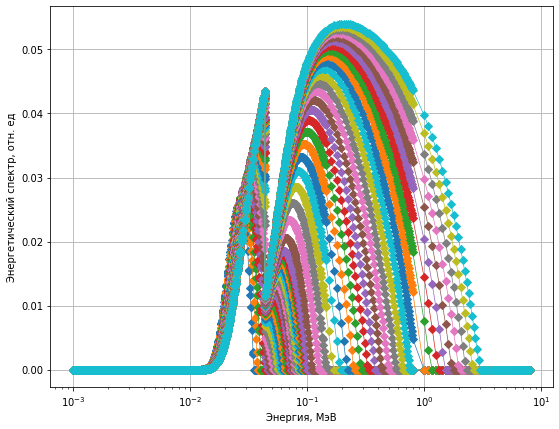

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [7]:
n = 11

In [8]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [9]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Уровни пропускания в К-крае

In [10]:
linspace3 = np.linspace(0.001, 0.9, 51)
for i, val in enumerate(linspace3):
    linspace3[i] = round(val, 5)
    
levels = []
levels.extend(linspace3)

Спектральные характеристики чувствительности каналов

In [11]:
def ross_by_k_level(num_1, num_2, level):
    t_2 = Material(num_2).lt(level)
    f_2 = R(Material(num_2), Material(num_2).lt(level)).f()
    t_1 = Material(num_1).lt(R(Material(num_2), Material(num_2).lt(level)).f()[Material(num_1).k_index()])
    f_1 = R(Material(num_1), t_1).f()
    return f_2 - f_1

In [12]:
resp_ross = []

start_time = time.time()
for ind, j in enumerate(levels):
    print(f'({ind}), время: {round(time.time() - start_time, 5)}, секунд')
    resp = []
    for i in range(n, 100):
        resp.append(ross_by_k_level(i, i+1, j))
    resp_ross.append(resp)

(0), время: 0.0, секунд
(1), время: 2.24822, секунд
(2), время: 4.57944, секунд
(3), время: 6.83676, секунд
(4), время: 9.10226, секунд
(5), время: 11.31749, секунд
(6), время: 13.44102, секунд
(7), время: 15.95192, секунд
(8), время: 18.58718, секунд
(9), время: 21.00782, секунд
(10), время: 23.40332, секунд
(11), время: 25.98329, секунд
(12), время: 28.45559, секунд
(13), время: 30.81588, секунд
(14), время: 33.16995, секунд
(15), время: 35.64027, секунд
(16), время: 38.13588, секунд
(17), время: 40.57156, секунд
(18), время: 43.07154, секунд
(19), время: 45.41742, секунд
(20), время: 47.91156, секунд
(21), время: 50.42819, секунд
(22), время: 52.90291, секунд
(23), время: 55.3704, секунд
(24), время: 58.47011, секунд
(25), время: 61.26693, секунд
(26), время: 63.79611, секунд
(27), время: 66.50082, секунд
(28), время: 69.07065, секунд
(29), время: 71.85697, секунд
(30), время: 74.5412, секунд
(31), время: 77.2813, секунд
(32), время: 80.04307, секунд
(33), время: 82.72156, секунд
(3

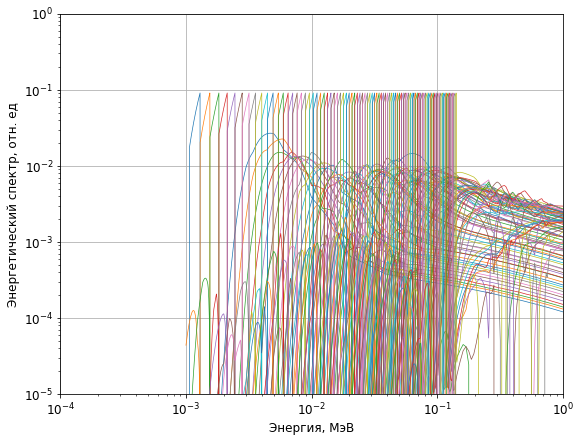

In [13]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_ross[5]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Матрицы задач

In [14]:
from garipov_deconvolution import get_coeff_simpson

In [15]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_ross)):
    print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
    matrix = []
    
    for response in resp_ross[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.0 секунд
(1), время: 3.24915 секунд
(2), время: 6.61144 секунд
(3), время: 9.82801 секунд
(4), время: 13.04055 секунд
(5), время: 16.10898 секунд
(6), время: 19.34211 секунд
(7), время: 22.62818 секунд
(8), время: 25.80096 секунд
(9), время: 29.16169 секунд
(10), время: 32.46405 секунд
(11), время: 35.69539 секунд
(12), время: 38.91363 секунд
(13), время: 41.99619 секунд
(14), время: 45.30541 секунд
(15), время: 48.76486 секунд
(16), время: 52.2435 секунд
(17), время: 55.33463 секунд
(18), время: 58.53024 секунд
(19), время: 61.69183 секунд
(20), время: 64.99659 секунд
(21), время: 68.4109 секунд
(22), время: 71.55013 секунд
(23), время: 74.69068 секунд
(24), время: 77.88545 секунд
(25), время: 81.93979 секунд
(26), время: 86.20778 секунд
(27), время: 90.25033 секунд
(28), время: 94.43684 секунд
(29), время: 98.48042 секунд
(30), время: 102.47582 секунд
(31), время: 106.42802 секунд
(32), время: 110.32385 секунд
(33), время: 114.45319 секунд
(34), время: 118.36606 секунд


Сигналы измерительных каналов

In [16]:
new_en = get_coeff_simpson(resp_ross[0][0], en, EDGE)[1]

In [17]:
def signals_from_one_spectrum(spectrum):
    
    start_time = time.time()
    signals_simpson = []
    
    # для каждой матрицы
    for i, matrix in enumerate(Matrixs):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        
        # сигналы для каждой задачи
        signals = []
        
        # для каждой строки в матрице
        for row in matrix:
            # значение одного сигнала
            signal = sum(row * np.interp(new_en, en, spectrum))
            signals.append(signal)
            
        signals_simpson.append(signals)
        
    return signals_simpson

Сигналы для каждого спектра

In [18]:
spectrums_signals = []

for spectrum in brems_e:
    spectrums_signals.append(signals_from_one_spectrum(spectrum))

(0), время: 0.0 секунд
(1), время: 0.04687 секунд
(2), время: 0.07811 секунд
(3), время: 0.12497 секунд
(4), время: 0.18684 секунд
(5), время: 0.23471 секунд
(6), время: 0.2746 секунд
(7), время: 0.3125 секунд
(8), время: 0.3524 секунд
(9), время: 0.40625 секунд
(10), время: 0.46011 секунд
(11), время: 0.49701 секунд
(12), время: 0.54688 секунд
(13), время: 0.59175 секунд
(14), время: 0.61673 секунд
(15), время: 0.66359 секунд
(16), время: 0.71046 секунд
(17), время: 0.75733 секунд
(18), время: 0.78857 секунд
(19), время: 0.83543 секунд
(20), время: 0.86667 секунд
(21), время: 0.91354 секунд
(22), время: 0.94478 секунд
(23), время: 0.99164 секунд
(24), время: 1.03851 секунд
(25), время: 1.06975 секунд
(26), время: 1.11661 секунд
(27), время: 1.1791 секунд
(28), время: 1.22596 секунд
(29), время: 1.25721 секунд
(30), время: 1.28845 секунд
(31), время: 1.33531 секунд
(32), время: 1.36656 секунд
(33), время: 1.41342 секунд
(34), время: 1.46028 секунд
(35), время: 1.49153 секунд
(36), врем

(43), время: 1.89018 секунд
(44), время: 1.92142 секунд
(45), время: 1.96829 секунд
(46), время: 2.01515 секунд
(47), время: 2.04639 секунд
(48), время: 2.10888 секунд
(49), время: 2.14012 секунд
(50), время: 2.18699 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.09373 секунд
(3), время: 0.14059 секунд
(4), время: 0.18745 секунд
(5), время: 0.2187 секунд
(6), время: 0.26556 секунд
(7), время: 0.2968 секунд
(8), время: 0.34367 секунд
(9), время: 0.39053 секунд
(10), время: 0.4374 секунд
(11), время: 0.48426 секунд
(12), время: 0.5155 секунд
(13), время: 0.56237 секунд
(14), время: 0.60923 секунд
(15), время: 0.65609 секунд
(16), время: 0.71858 секунд
(17), время: 0.76544 секунд
(18), время: 0.79668 секунд
(19), время: 0.85917 секунд
(20), время: 0.90604 секунд
(21), время: 0.9529 секунд
(22), время: 0.99976 секунд
(23), время: 1.04663 секунд
(24), время: 1.09349 секунд
(25), время: 1.14036 секунд
(26), время: 1.18722 секунд
(27), время: 1.21846 секунд
(28), время

(35), время: 1.6338 секунд
(36), время: 1.68066 секунд
(37), время: 1.71191 секунд
(38), время: 1.74315 секунд
(39), время: 1.79001 секунд
(40), время: 1.82126 секунд
(41), время: 1.86812 секунд
(42), время: 1.91498 секунд
(43), время: 1.94623 секунд
(44), время: 2.00871 секунд
(45), время: 2.05558 секунд
(46), время: 2.10244 секунд
(47), время: 2.16492 секунд
(48), время: 2.19617 секунд
(49), время: 2.24303 секунд
(50), время: 2.28989 секунд
(0), время: 0.0 секунд
(1), время: 0.03124 секунд
(2), время: 0.07811 секунд
(3), время: 0.12497 секунд
(4), время: 0.17183 секунд
(5), время: 0.20308 секунд
(6), время: 0.24994 секунд
(7), время: 0.2968 секунд
(8), время: 0.35929 секунд
(9), время: 0.39053 секунд
(10), время: 0.4374 секунд
(11), время: 0.48426 секунд
(12), время: 0.54675 секунд
(13), время: 0.57799 секунд
(14), время: 0.62485 секунд
(15), время: 0.67172 секунд
(16), время: 0.71858 секунд
(17), время: 0.76544 секунд
(18), время: 0.81231 секунд
(19), время: 0.85917 секунд
(20), вре

(30), время: 1.34343 секунд
(31), время: 1.3903 секунд
(32), время: 1.43716 секунд
(33), время: 1.48403 секунд
(34), время: 1.53089 секунд
(35), время: 1.57775 секунд
(36), время: 1.62462 секунд
(37), время: 1.67148 секунд
(38), время: 1.71835 секунд
(39), время: 1.78083 секунд
(40), время: 1.81207 секунд
(41), время: 1.85894 секунд
(42), время: 1.9058 секунд
(43), время: 1.95266 секунд
(44), время: 1.99953 секунд
(45), время: 2.03077 секунд
(46), время: 2.06201 секунд
(47), время: 2.10888 секунд
(48), время: 2.14012 секунд
(49), время: 2.18699 секунд
(50), время: 2.21823 секунд
(0), время: 0.0 секунд
(1), время: 0.03124 секунд
(2), время: 0.07811 секунд
(3), время: 0.12497 секунд
(4), время: 0.17183 секунд
(5), время: 0.2187 секунд
(6), время: 0.28118 секунд
(7), время: 0.32805 секунд
(8), время: 0.39053 секунд
(9), время: 0.4374 секунд
(10), время: 0.48426 секунд
(11), время: 0.53112 секунд
(12), время: 0.57799 секунд
(13), время: 0.62485 секунд
(14), время: 0.68734 секунд
(15), врем

(23), время: 1.07787 секунд
(24), время: 1.12474 секунд
(25), время: 1.1716 секунд
(26), время: 1.21846 секунд
(27), время: 1.24971 секунд
(28), время: 1.313 секунд
(29), время: 1.36025 секунд
(30), время: 1.40711 секунд
(31), время: 1.45398 секунд
(32), время: 1.50653 секунд
(33), время: 1.54941 секунд
(34), время: 1.59329 секунд
(35), время: 1.64416 секунд
(36), время: 1.70898 секунд
(37), время: 1.76583 секунд
(38), время: 1.81769 секунд
(39), время: 1.87354 секунд
(40), время: 1.93139 секунд
(41), время: 1.97763 секунд
(42), время: 2.03991 секунд
(43), время: 2.0928 секунд
(44), время: 2.13967 секунд
(45), время: 2.20215 секунд
(46), время: 2.24902 секунд
(47), время: 2.29588 секунд
(48), время: 2.35837 секунд
(49), время: 2.42085 секунд
(50), время: 2.48334 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.10935 секунд
(3), время: 0.15621 секунд
(4), время: 0.20308 секунд
(5), время: 0.26556 секунд
(6), время: 0.31243 секунд
(7), время: 0.37491 секунд
(8), вре

(17), время: 0.8748 секунд
(18), время: 0.92166 секунд
(19), время: 0.98414 секунд
(20), время: 1.03101 секунд
(21), время: 1.07787 секунд
(22), время: 1.12473 секунд
(23), время: 1.18722 секунд
(24), время: 1.23408 секунд
(25), время: 1.28095 секунд
(26), время: 1.34343 секунд
(27), время: 1.3903 секунд
(28), время: 1.45278 секунд
(29), время: 1.49965 секунд
(30), время: 1.54651 секунд
(31), время: 1.609 секунд
(32), время: 1.65586 секунд
(33), время: 1.71835 секунд
(34), время: 1.76521 секунд
(35), время: 1.8277 секунд
(36), время: 1.87456 секунд
(37), время: 1.92142 секунд
(38), время: 1.98391 секунд
(39), время: 2.03077 секунд
(40), время: 2.07764 секунд
(41), время: 2.14012 секунд
(42), время: 2.20261 секунд
(43), время: 2.24947 секунд
(44), время: 2.29633 секунд
(45), время: 2.35882 секунд
(46), время: 2.40568 секунд
(47), время: 2.45255 секунд
(48), время: 2.49941 секунд
(49), время: 2.5619 секунд
(50), время: 2.60876 секунд
(0), время: 0.0 секунд
(1), время: 0.06249 секунд
(2),

(9), время: 0.48426 секунд
(10), время: 0.53112 секунд
(11), время: 0.57799 секунд
(12), время: 0.64047 секунд
(13), время: 0.68734 секунд
(14), время: 0.74982 секунд
(15), время: 0.81231 секунд
(16), время: 0.85917 секунд
(17), время: 0.92166 секунд
(18), время: 0.98414 секунд
(19), время: 1.03101 секунд
(20), время: 1.07787 секунд
(21), время: 1.12474 секунд
(22), время: 1.1716 секунд
(23), время: 1.23408 секунд
(24), время: 1.28095 секунд
(25), время: 1.34344 секунд
(26), время: 1.37468 секунд
(27), время: 1.43716 секунд
(28), время: 1.48403 секунд
(29), время: 1.54651 секунд
(30), время: 1.59338 секунд
(31), время: 1.65586 секунд
(32), время: 1.70272 секунд
(33), время: 1.76521 секунд
(34), время: 1.81207 секунд
(35), время: 1.85894 секунд
(36), время: 1.92142 секунд
(37), время: 1.96829 секунд
(38), время: 2.03077 секунд
(39), время: 2.07764 секунд
(40), время: 2.1245 секунд
(41), время: 2.18699 секунд
(42), время: 2.24947 секунд
(43), время: 2.29633 секунд
(44), время: 2.35882 се

(1), время: 0.07811 секунд
(2), время: 0.14059 секунд
(3), время: 0.20308 секунд
(4), время: 0.26556 секунд
(5), время: 0.32805 секунд
(6), время: 0.39053 секунд
(7), время: 0.45302 секунд
(8), время: 0.5155 секунд
(9), время: 0.59103 секунд
(10), время: 0.67154 секунд
(11), время: 0.73403 секунд
(12), время: 0.79651 секунд
(13), время: 0.87462 секунд
(14), время: 0.9371 секунд
(15), время: 0.99959 секунд
(16), время: 1.06207 секунд
(17), время: 1.12456 секунд
(18), время: 1.20266 секунд
(19), время: 1.24953 секунд
(20), время: 1.31201 секунд
(21), время: 1.39012 секунд
(22), время: 1.43699 секунд
(23), время: 1.49947 секунд
(24), время: 1.56196 секунд
(25), время: 1.62444 секунд
(26), время: 1.70255 секунд
(27), время: 1.76503 секунд
(28), время: 1.84314 секунд
(29), время: 1.90563 секунд
(30), время: 1.96811 секунд
(31), время: 2.04622 секунд
(32), время: 2.12432 секунд
(33), время: 2.17119 секунд
(34), время: 2.23367 секунд
(35), время: 2.29616 секунд
(36), время: 2.35864 секунд
(37

(46), время: 2.93907 секунд
(47), время: 2.98594 секунд
(48), время: 3.04842 секунд
(49), время: 3.11091 секунд
(50), время: 3.17339 секунд
(0), время: 0.0 секунд
(1), время: 0.06248 секунд
(2), время: 0.12497 секунд
(3), время: 0.18746 секунд
(4), время: 0.24994 секунд
(5), время: 0.31243 секунд
(6), время: 0.37491 секунд
(7), время: 0.4374 секунд
(8), время: 0.49988 секунд
(9), время: 0.57799 секунд
(10), время: 0.64047 секунд
(11), время: 0.70296 секунд
(12), время: 0.76544 секунд
(13), время: 0.82793 секунд
(14), время: 0.89042 секунд
(15), время: 0.9529 секунд
(16), время: 1.01539 секунд
(17), время: 1.07787 секунд
(18), время: 1.14036 секунд
(19), время: 1.20284 секунд
(20), время: 1.26533 секунд
(21), время: 1.32782 секунд
(22), время: 1.3903 секунд
(23), время: 1.45278 секунд
(24), время: 1.51527 секунд
(25), время: 1.57776 секунд
(26), время: 1.64024 секунд
(27), время: 1.71835 секунд
(28), время: 1.78083 секунд
(29), время: 1.84332 секунд
(30), время: 1.9058 секунд
(31), врем

Восстановление спектров

In [19]:
from garipov_deconvolution import Gold

In [20]:
def deconvolution_one_spectrum(spectrum, signals_from_this_spectrum):
    
    sp = [0 for i in range(len(resp_ross))]
    dev = [0 for i in range(len(resp_ross))]
    norm = [0 for i in range(len(resp_ross))]
    
    start_time = time.time()
    
    for i in range(len(resp_ross)):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        sp[i], norm[i], dev[i] = Gold(Matrixs[i], signals_from_this_spectrum[i], en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    return sp, dev

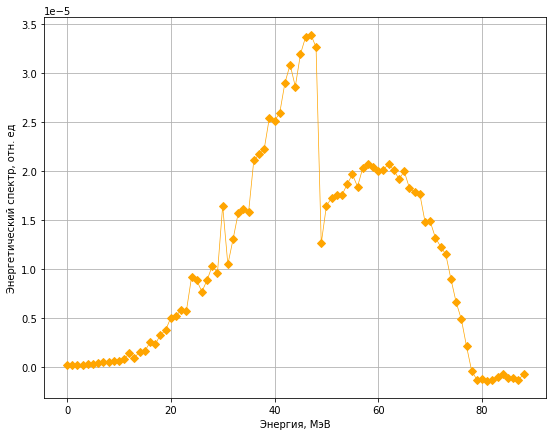

In [21]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(range(89), spectrums_signals[25][25], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Скрипт

In [22]:
SP, DEV = [], []

for j in range(len(brems_e)):
    sp, dev = deconvolution_one_spectrum(brems_e[j], spectrums_signals[j])
    SP.append(sp)
    DEV.append(dev)
    print(f'ВЫПОЛНЕНО {j+1} из {len(brems_e)}')

(0), время: 0.0 секунд
(1), время: 6.18588 секунд
(2), время: 12.41265 секунд
(3), время: 18.67733 секунд
(4), время: 24.92779 секунд
(5), время: 31.16124 секунд
(6), время: 37.48917 секунд
(7), время: 44.02953 секунд
(8), время: 50.53607 секунд
(9), время: 57.06889 секунд
(10), время: 63.60289 секунд
(11), время: 70.21523 секунд
(12), время: 76.81453 секунд
(13), время: 83.46808 секунд
(14), время: 90.11019 секунд
(15), время: 96.87564 секунд
(16), время: 103.52255 секунд
(17), время: 110.14687 секунд
(18), время: 116.77711 секунд
(19), время: 123.37677 секунд
(20), время: 129.9766 секунд
(21), время: 136.57694 секунд
(22), время: 143.1769 секунд
(23), время: 149.85693 секунд
(24), время: 156.58259 секунд
(25), время: 163.2855 секунд
(26), время: 169.95042 секунд
(27), время: 176.61388 секунд
(28), время: 183.26173 секунд
(29), время: 189.91058 секунд
(30), время: 196.54301 секунд
(31), время: 203.16042 секунд
(32), время: 209.76016 секунд
(33), время: 216.4241 секунд
(34), время: 223

(23), время: 165.00803 секунд
(24), время: 172.25948 секунд
(25), время: 179.5777 секунд
(26), время: 186.86614 секунд
(27), время: 194.16312 секунд
(28), время: 201.38188 секунд
(29), время: 208.88849 секунд
(30), время: 216.07772 секунд
(31), время: 223.25155 секунд
(32), время: 230.39992 секунд
(33), время: 237.54716 секунд
(34), время: 244.73184 секунд
(35), время: 251.8692 секунд
(36), время: 259.00806 секунд
(37), время: 266.14436 секунд
(38), время: 273.31448 секунд
(39), время: 280.51864 секунд
(40), время: 287.63965 секунд
(41), время: 294.83791 секунд
(42), время: 301.96382 секунд
(43), время: 309.39875 секунд
(44), время: 316.60487 секунд
(45), время: 323.74031 секунд
(46), время: 331.06614 секунд
(47), время: 338.18527 секунд
(48), время: 345.28847 секунд
(49), время: 352.36975 секунд
(50), время: 359.45464 секунд
ВЫПОЛНЕНО 6 из 50
(0), время: 0.0 секунд
(1), время: 7.10334 секунд
(2), время: 14.2231 секунд
(3), время: 21.34302 секунд
(4), время: 28.46174 секунд
(5), время:

(45), время: 323.54759 секунд
(46), время: 330.68334 секунд
(47), время: 337.80269 секунд
(48), время: 344.90783 секунд
(49), время: 351.97982 секунд
(50), время: 359.05459 секунд
ВЫПОЛНЕНО 11 из 50
(0), время: 0.0 секунд
(1), время: 7.12807 секунд
(2), время: 14.23125 секунд
(3), время: 21.36562 секунд
(4), время: 28.53608 секунд
(5), время: 35.66119 секунд
(6), время: 42.74817 секунд
(7), время: 49.83532 секунд
(8), время: 56.95307 секунд
(9), время: 64.08839 секунд
(10), время: 71.42609 секунд
(11), время: 78.66322 секунд
(12), время: 85.88456 секунд
(13), время: 93.07012 секунд
(14), время: 100.30575 секунд
(15), время: 107.47627 секунд
(16), время: 114.66297 секунд
(17), время: 121.83558 секунд
(18), время: 129.05822 секунд
(19), время: 136.19812 секунд
(20), время: 143.38831 секунд
(21), время: 150.66825 секунд
(22), время: 157.8478 секунд
(23), время: 165.05162 секунд
(24), время: 172.28669 секунд
(25), время: 179.53826 секунд
(26), время: 186.86875 секунд
(27), время: 194.28168

(16), время: 114.62455 секунд
(17), время: 121.88035 секунд
(18), время: 129.08245 секунд
(19), время: 136.26853 секунд
(20), время: 143.44096 секунд
(21), время: 150.62829 секунд
(22), время: 158.09687 секунд
(23), время: 165.39955 секунд
(24), время: 172.71692 секунд
(25), время: 180.00174 секунд
(26), время: 187.23885 секунд
(27), время: 194.47378 секунд
(28), время: 201.67564 секунд
(29), время: 208.84719 секунд
(30), время: 216.12235 секунд
(31), время: 223.26794 секунд
(32), время: 230.41069 секунд
(33), время: 237.64382 секунд
(34), время: 244.7604 секунд
(35), время: 251.88411 секунд
(36), время: 259.01076 секунд
(37), время: 266.13232 секунд
(38), время: 273.43984 секунд
(39), время: 280.65674 секунд
(40), время: 287.82833 секунд
(41), время: 294.96686 секунд
(42), время: 302.08773 секунд
(43), время: 309.20955 секунд
(44), время: 316.3137 секунд
(45), время: 323.40017 секунд
(46), время: 330.48799 секунд
(47), время: 337.64244 секунд
(48), время: 344.74411 секунд
(49), время:

(38), время: 278.3447 секунд
(39), время: 285.53298 секунд
(40), время: 292.70563 секунд
(41), время: 299.9301 секунд
(42), время: 307.10016 секунд
(43), время: 314.27293 секунд
(44), время: 321.49205 секунд
(45), время: 328.64838 секунд
(46), время: 335.78502 секунд
(47), время: 342.89023 секунд
(48), время: 349.9964 секунд
(49), время: 357.13209 секунд
(50), время: 364.51745 секунд
ВЫПОЛНЕНО 22 из 50
(0), время: 0.0 секунд
(1), время: 7.17177 секунд
(2), время: 14.2945 секунд
(3), время: 21.40165 секунд
(4), время: 28.80888 секунд
(5), время: 35.88195 секунд
(6), время: 42.98628 секунд
(7), время: 50.16013 секунд
(8), время: 57.68397 секунд
(9), время: 64.88913 секунд
(10), время: 72.16238 секунд
(11), время: 79.33112 секунд
(12), время: 86.51678 секунд
(13), время: 93.70877 секунд
(14), время: 100.90463 секунд
(15), время: 108.29004 секунд
(16), время: 115.58358 секунд
(17), время: 122.85398 секунд
(18), время: 130.09015 секунд
(19), время: 137.29456 секунд
(20), время: 144.51124 се

(8), время: 61.38459 секунд
(9), время: 69.23487 секунд
(10), время: 77.20904 секунд
(11), время: 85.19567 секунд
(12), время: 93.22839 секунд
(13), время: 101.34222 секунд
(14), время: 109.47319 секунд
(15), время: 117.8194 секунд
(16), время: 126.26033 секунд
(17), время: 134.60628 секунд
(18), время: 142.91988 секунд
(19), время: 151.26497 секунд
(20), время: 159.85082 секунд
(21), время: 168.06611 секунд
(22), время: 176.16705 секунд
(23), время: 184.24374 секунд
(24), время: 192.24221 секунд
(25), время: 200.16034 секунд
(26), время: 208.00029 секунд
(27), время: 215.88329 секунд
(28), время: 223.85088 секунд
(29), время: 231.74006 секунд
(30), время: 239.74549 секунд
(31), время: 247.64602 секунд
(32), время: 255.56704 секунд
(33), время: 263.43923 секунд
(34), время: 271.32949 секунд
(35), время: 279.43268 секунд
(36), время: 287.42451 секунд
(37), время: 295.44819 секунд
(38), время: 303.53617 секунд
(39), время: 311.64159 секунд
(40), время: 319.61984 секунд
(41), время: 327.9

(29), время: 234.70197 секунд
(30), время: 242.72926 секунд
(31), время: 250.98997 секунд
(32), время: 259.13933 секунд
(33), время: 267.77121 секунд
(34), время: 275.84743 секунд
(35), время: 283.96399 секунд
(36), время: 292.14684 секунд
(37), время: 300.33439 секунд
(38), время: 308.60252 секунд
(39), время: 316.95917 секунд
(40), время: 325.23774 секунд
(41), время: 333.49488 секунд
(42), время: 341.68911 секунд
(43), время: 349.97599 секунд
(44), время: 358.32764 секунд
(45), время: 366.81499 секунд
(46), время: 375.58979 секунд
(47), время: 384.10067 секунд
(48), время: 392.56826 секунд
(49), время: 401.05606 секунд
(50), время: 409.46038 секунд
ВЫПОЛНЕНО 33 из 50
(0), время: 0.0 секунд
(1), время: 7.3667 секунд
(2), время: 14.78449 секунд
(3), время: 22.1414 секунд
(4), время: 29.59605 секунд
(5), время: 37.21812 секунд
(6), время: 44.84228 секунд
(7), время: 52.68037 секунд
(8), время: 60.58476 секунд
(9), время: 68.77333 секунд
(10), время: 77.34911 секунд
(11), время: 85.6922

(50), время: 423.62481 секунд
ВЫПОЛНЕНО 38 из 50
(0), время: 0.0 секунд
(1), время: 7.61322 секунд
(2), время: 15.23277 секунд
(3), время: 23.10592 секунд
(4), время: 30.79217 секунд
(5), время: 38.51543 секунд
(6), время: 46.38709 секунд
(7), время: 54.41872 секунд
(8), время: 62.54384 секунд
(9), время: 70.69005 секунд
(10), время: 78.77904 секунд
(11), время: 86.68459 секунд
(12), время: 94.47709 секунд
(13), время: 102.29814 секунд
(14), время: 110.48902 секунд
(15), время: 118.60392 секунд
(16), время: 126.80719 секунд
(17), время: 135.13358 секунд
(18), время: 143.48524 секунд
(19), время: 151.89491 секунд
(20), время: 160.32397 секунд
(21), время: 168.77866 секунд
(22), время: 177.10331 секунд
(23), время: 185.48367 секунд
(24), время: 193.95784 секунд
(25), время: 202.42487 секунд
(26), время: 210.98232 секунд
(27), время: 219.59353 секунд
(28), время: 228.50708 секунд
(29), время: 237.35486 секунд
(30), время: 246.21093 секунд
(31), время: 255.09359 секунд
(32), время: 264.012

(21), время: 157.06569 секунд
(22), время: 164.51992 секунд
(23), время: 172.16602 секунд
(24), время: 179.95162 секунд
(25), время: 187.84774 секунд
(26), время: 195.89144 секунд
(27), время: 204.25531 секунд
(28), время: 212.46065 секунд
(29), время: 220.71299 секунд
(30), время: 229.02809 секунд
(31), время: 237.38384 секунд
(32), время: 245.84955 секунд
(33), время: 254.46291 секунд
(34), время: 263.248 секунд
(35), время: 272.12195 секунд
(36), время: 281.17627 секунд
(37), время: 290.2469 секунд
(38), время: 299.41557 секунд
(39), время: 308.71549 секунд
(40), время: 318.30676 секунд
(41), время: 327.83762 секунд
(42), время: 337.48094 секунд
(43), время: 347.16781 секунд
(44), время: 356.90842 секунд
(45), время: 366.74363 секунд
(46), время: 376.62308 секунд
(47), время: 386.8362 секунд
(48), время: 396.76342 секунд
(49), время: 406.40344 секунд
(50), время: 415.5918 секунд
ВЫПОЛНЕНО 44 из 50
(0), время: 0.0 секунд
(1), время: 7.92816 секунд
(2), время: 15.79915 секунд
(3), вре

(42), время: 317.14843 секунд
(43), время: 325.82526 секунд
(44), время: 334.56742 секунд
(45), время: 343.54568 секунд
(46), время: 352.5144 секунд
(47), время: 361.42843 секунд
(48), время: 370.3208 секунд
(49), время: 379.13389 секунд
(50), время: 387.58875 секунд
ВЫПОЛНЕНО 49 из 50
(0), время: 0.0 секунд
(1), время: 7.82855 секунд
(2), время: 15.79757 секунд
(3), время: 23.71769 секунд
(4), время: 31.36043 секунд
(5), время: 38.78903 секунд
(6), время: 46.16862 секунд
(7), время: 53.47489 секунд
(8), время: 60.67872 секунд
(9), время: 67.79952 секунд
(10), время: 74.82025 секунд
(11), время: 81.32733 секунд
(12), время: 87.84577 секунд
(13), время: 94.31691 секунд
(14), время: 100.79901 секунд
(15), время: 107.2473 секунд
(16), время: 113.69775 секунд
(17), время: 120.12845 секунд
(18), время: 126.54452 секунд
(19), время: 132.99348 секунд
(20), время: 139.52645 секунд
(21), время: 145.96025 секунд
(22), время: 152.4586 секунд
(23), время: 158.97366 секунд
(24), время: 165.45456 се

Сохранение данных

In [23]:
np.save(f'R_{m}_SP.npy', SP)
np.save(f'R_{m}_DEV.npy', DEV)

Загрузка данных

Построение

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
len(DEV[0])

51

In [27]:
D = np.array(DEV)
X,Y = np.meshgrid(levels, beams_energyes)
X, Ylog = np.meshgrid(levels, np.log10(beams_energyes))
Xlog, Ylog = np.meshgrid(np.log10(levels), np.log10(beams_energyes))

Контурная карта

In [28]:
linspace4 = np.geomspace(5e-3, 0.3, 15)
linspace5 = np.linspace(0.31, 2, 15)

In [29]:
c_map_levels = []
c_map_levels.extend(linspace4)
c_map_levels.extend(linspace5)

Text(0, 0.5, 'Энергия электронов, МэВ')

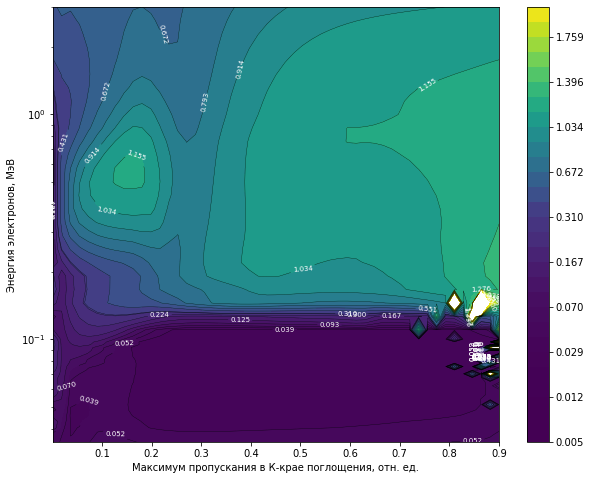

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

c_map = ax.contourf(X, Y, D, levels=c_map_levels)
borders = ax.contour(X, Y, D, colors='k', levels=c_map_levels, linewidths=0.3)
ax.clabel(borders, fontsize=7, colors='w')
fig.colorbar(c_map)
# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')

# fig.savefig('Фильтры_Росса_контурная_карта.jpg', bbox_inches='tight')

Зависимость минимальной ошибки восстановления от граничной энерии спектра

In [31]:
minimal_deviations = []

for i,val in enumerate(beams_energyes):
    min_value = min(DEV[i])
    minimal_deviations.append(min_value)

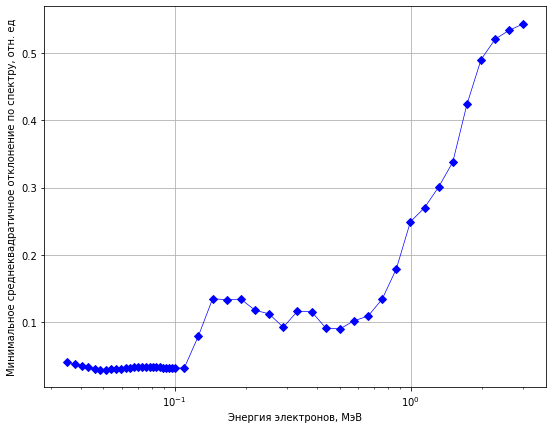

In [32]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, minimal_deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('Фильтры_Росса_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

In [33]:
np.save(f'R_{m}_MIN.npy', minimal_deviations)